In [1]:
import  sys
sys.path.append('../')
import  latexStrings  as ls
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pdesolver

# Ejercicio 2

Dado el PVIF (\ref{eq:1}) planteado anteriormente, veamos el comportamiento del metodo implicito para su aproximacion:

In [2]:
u = lambda x, t: np.exp(-np.pi*t)*np.sin(np.pi*x)
eq= {}
eq['D'] = 1/np.pi
eq['ic'] = lambda x : np.sin(np.pi*x)
eq['bcL'] = lambda t : 0
eq['bcR'] = lambda t : -np.pi*np.exp(-np.pi*t)
Ix = [0, 1]
It = [0, 1]

Primero observemos una grafica de la aproximacion usando 20 pasos en el espacio ($h = 1/20$) y 10 pasos en el tiempo ($k = 1/10$):

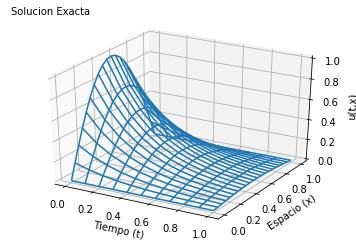

In [3]:
M = 20
N = 10

W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
U = np.array([[u(x,t) for t in T] for x in X])

MeshT, MeshX = np.meshgrid(T, X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, U)

ax.text2D(0, 1, "Solucion Exacta", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()

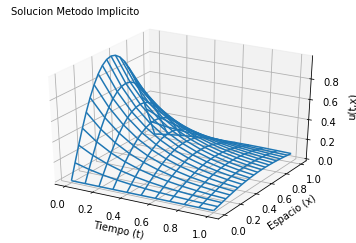

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, W)

ax.text2D(0, 1, "Solucion Metodo Implicito", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()

Vemos que con los mismos pasos en el tiempo, pero mas de 20 veces menos los pasos en el tiempo, el metodo implicito obtiene una aproximacion comparable a la del metodo explicito. Ahora veamos como varia el error al considerar los pasos $k = \{1/16, 1/64, 1/256\}$ y $h = \{ 1/10, 1/20, 1/40 \}$:

In [5]:
h = [10, 20, 40]
k = [16, 64, 256]
data = []

for i in range(3):
    M = h[i]
    N = k[i]
    W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
    U = u(X, 1)
    maxError = max(abs(U-W[:,-1]))
    eoc = 'NaN' if i == 0 else np.log(maxError/prevError)/np.log(h[i-1] / M)
    data.append([ maxError, eoc ])
    prevError = maxError

data = [['1/10', '1/16'] + data[0], ['1/20', '1/64'] + data[1], ['1/40', '1/256'] + data[2]]
header = ['h', 'k', 'Error', 'erc']
Latex(ls.latexTable(header, data, 'cc|rr'))

<IPython.core.display.Latex object>

En los resultados se puede observar: $$Error(h_2,k_2)= 0.014939536443073914\approx\left(\frac{1}{4}\right)0.05783108269993153=\left(\frac{1}{4}\right)Error(h_1,k_1)$$ y que $$Error(h_3,k_3)=0.0037665127468114214\approx\left(\frac{1}{4}\right) 0.014939536443073914=\left(\frac{1}{4}\right)Error(h_2,k_2)$$

Teóricamente error se comporta como: $$Error(h,k)=O(h^2 + k)$$

Notemos que en este caso $h_{i+1}=\frac{1}{2}h_i \quad$ y $\quad k_{i+1}=\frac{1}{4}k_i\quad $ con $i\in\{1,2,3\}$, entonces: $$Error(h_{i+1},k_{i+1})=O(h_{i+1}^2+k_{i+1})=O(\frac{h_{i}^2}{2^2}+\frac{k_{i}}{4})=\frac{1}{4}O(h_{i}^2+k_{i})$$  


Podemos ver a $k$ como función de $h$ de la siguiente forma:
$$k(h)=\frac{25}{4}h^2$$

Sustituyendo la expresión anterior en el error: $$Error(h,k)=O(h^2+k)=O(h^2+\frac{25}{4}h^2)\approx O(h^2)$$

Por otro lado, si calculamos el "$erc$ (\textit{estimated rate of convergence}) dado por : $$erc_i:=\frac{\ln(Error(h_i)/Error(h_{i+1}))}{\ln(h_i/h_{i+1})}$$

con $i\in \{ 1,2 \}$ debe ser $erc\approx 2 $ dado que $Error(h)=O(h^2)$ es de orden 2.

En la tabla observamos los valores de $erc_1$ y de $erc_2$: 

$$erc_1=1.952709728546003\approx 2$$ $$erc_2=1.987834066736966 \approx 2$$


Por lo tanto, en este caso el error en función de $h$,$\quad Error(h)=O(h^2) $, se reduce de manera cuadrática, entonces nuestros resultados son consistentes con la teoría.

Ahora consideremos los pasos $k = h = \{ 1/10, 1/20, 1/40 \}$:

In [9]:
h = [10, 20, 40]
k = [10, 20, 40]
data = []

for i in range(3):
    M = h[i]
    N = k[i]
    W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
    U = u(X, 1)
    maxError = max(abs(U-W[:,-1]))
    eoc = 'NaN' if i == 0 else np.log(maxError/prevError)/np.log(h[i-1] / M)
    data.append([ maxError, eoc ])
    prevError = maxError

data = [['1/10', '1/10'] + data[0], ['1/20', '1/20'] + data[1], ['1/40', '1/40'] + data[2]]
header = ['h', 'k', 'Error', 'erc']
Latex(ls.latexTable(header, data, 'cc|rr'))

<IPython.core.display.Latex object>

Podemos observar que: $$Error(h_{2},k_{2})=0.03789343824335091\approx\left(\frac{1}{2}\right)0.08096946676799946=\left(\frac{1}{2}\right)Error(h_{1},k_{1})$$ 

 $$Error(h_{3},k_{3})=0.018281192075090623\approx\left(\frac{1}{2}\right)0.03789343824335091=\left(\frac{1}{2}\right)Error(h_{2},k_{2})$$ 

Como se mencionó anteriormente, el error se comporta de la siguiente manera: $$Error(h,k)=O(h^2 + k)$$ 

En este caso, como $h_i=k_i$ entonces: $$Error(h,k)=O(h^2 + k)= O(h^2 + k) \approx O(k):=Error(k)$$

Como $h_{i+1}=k_{i+1}=\frac{1}{2}h_i=\frac{1}{2}k_i$ con $i\in\{1,2,3\}$ entonces : $$Error(h_{i+1})=O(h_{i+1})=O \left(\frac{h_i}{2}\right)\approx \frac{1}{2}O(h_i)=\frac{1}{2}Error(h_i)$$

Por lo tanto, para $h=k$, teóricamente el error se comporta de manera lineal dado que $Error(h)=O(h)$ es de orden 1. Entonces si calculamos el $erc$, deberíamos obtener $erc_i\approx 1$.

 En la tabla anterior se oberva: 

$$erc_1=1.0954299285102875\approx 1$$ $$erc_2=1.0515878997074606 \approx 1$$



En conclusión, el error en función de $h$ dado $h=k$,$\quad Error(h)=O(h) $,  se reduce de manera lineal, entonces  nuestros resultados son consistentes con la teoría.

Finalmente tomemos los pasos $h = 1/10$, $k = \{1/25, 1/50, 1/100, 1/200\}$:

In [31]:
M = 10
k = [25, 50, 100, 200]
data = []

for i in range(4):
    N = k[i]
    W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
    U = u(X, 1)
    maxError = max(abs(U-W[:,-1]))
    eoc = 'NaN' if i == 0 else np.log(maxError/prevError)/np.log(k[i-1] / N)
    data.append([ maxError, eoc ])
    prevError = maxError

datas = [['1/25'] + data[0], ['1/50'] + data[1], ['1/100'] + data[2], ['1/200'] + data[3], ['1/400']]
header = ['k', 'Error', 'erc']
Latex(ls.latexTable(header, datas, 'cc|rr'))

<IPython.core.display.Latex object>

Podemos observar que: $$Error(h,k_{2})=0.029839315067499525\approx\left(\frac{7}{10}\right)0.04325257845808599=\left(\frac{7}{10}\right)Error(h,k_{1})$$ 

 $$Error(h,k_{3})=0.022968343027895775\approx\left(\frac{8}{10}\right)0.029839315067499525=\left(\frac{8}{10}\right)Error(h,k_{2})$$ 

 $$Error(h,k_{4})=0.01949112341433859\approx\left(\frac{8.5}{10}\right)0.022968343027895775=\left(\frac{8.5}{10}\right)Error(h,k_{3})$$ 

$$erc_1=0.535571719788062$$ $$erc_2=0.3775676381110379$$ 
$$erc_3=0.2368295362621924$$

Recordemos que $$Error(h,k)=O(h^2 + k)\approx O(k)$$  

Esto indica que en teoría el error debería decrecer linealmente con k, o bien, al duplicar el número de pasos en el tiempo esperamos que el error se reduzca a la mitad. 

Sin embargo, en este ejemplo notamos que el error no parece decrecer linealmente. Aún más, parece que $Error(h, k_i)/Error(h,k_{i-1})$ tiende a 1 cuando i tiende a infinito. ¿A qué se debe esto? ¿Acaso la teoría está mal?

Todo se explica al considerar el valaor inicial de h. Si se tomara un paso en el tiempo extremadamente pequeño, como $h=\frac{1}{100}$, se puede comprobar que, efectivamente, el error se reduce aproximadamente a la mitad en cada iteración, ya que $h^2$ es verdaderamente insignificante comparado con k.

In [66]:
M = 100
k = [25, 50, 100, 200, 400]
data = []

for i in range(5):
    N = k[i]
    W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
    U = u(X, 1)
    maxError = max(abs(U-W[:,-1]))
    eoc = 'NaN' if i == 0 else np.log(maxError/prevError)/np.log(k[i-1] / N)
    data.append([ maxError, eoc ])
    prevError = maxError

In [67]:
data_ = [['1/25'] + data[0], ['1/50'] + data[1], ['1/100'] + data[2], ['1/200'] + data[3], ['1/400']]
header = ['k', 'Error', 'erc']
Latex(ls.latexTable(header, data_, 'cc|rr'))

<IPython.core.display.Latex object>

Observemos la proporción de los errores en dos iteraciones consecutivas:

In [68]:
for i in range(1,5):
    t = data[i][0]/data[i-1][0]
    print('err{}/err{} = {} aproximadamente igual a {}'.format(i, i-1, t, round(t,1)))

err1/err0 = 0.5110768301966724 aproximadamente igual a 0.5
err2/err1 = 0.5098565587061679 aproximadamente igual a 0.5
err3/err2 = 0.5134462734523407 aproximadamente igual a 0.5
err4/err3 = 0.5233002658758356 aproximadamente igual a 0.5


$$erc_1=0.9683879070281239\approx 1$$ $$erc_2=0.9718366735889601 \approx 1$$ 
$$erc_4=0.9617147727335159\approx 1$$ $$erc_3=0.9342891029371191 \approx 1$$ 

Que es lo que se espera teoréticamente si $Error(h,k) = O(k)$

Ahora, regresando al ejemplo original, observamos que $h^2 = \frac{1}{100}$, y, aun que inicialmente $k_0 =\frac{1}{25} << h^2$, después de dos iteraciones tenemos que $k_2 = \frac{1}{100}=h$, por lo que ya no es cierto que $Error(h,k)=O(h^2 + k)\approx O(k)$ 

Para las iteraciones consecuentes se cumple que $k_i < h$, por lo que seguir disminuyendo la magnitud de el paso en el tiempo tiene poco efecto sobre el error máximo.